### ***Team comparision Analysis***

In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats

In [ ]:
#Load the data file
football_data = pd.read_csv("/content/Football_data_merged_cleaned_data (3).csv")
football_data.head()

,appearance_id,game_id_x,player_id_x,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,season,...,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,game_lineups_id,type_y,number,player_name_y,team_captain,position_y
0,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,186.0,700000.0,5000000.0,2025-06-30 00:00:00.000000000,8d717b1017e72d89d2ee1112bb2d7466,substitutes,22,Timothy Chandler,0,Right-Back
1,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,186.0,700000.0,5000000.0,2025-06-30 00:00:00.000000000,d53eb3fd74523d6dd4536653c145ae96,substitutes,22,Timothy Chandler,0,Right-Back
2,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,186.0,700000.0,5000000.0,2025-06-30 00:00:00.000000000,3efc21c645e46b2f411bcdb1710aa444,substitutes,22,Timothy Chandler,0,Right-Back
3,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,186.0,700000.0,5000000.0,2025-06-30 00:00:00.000000000,cc79e78c570ce19872dfed125d324407,substitutes,22,Timothy Chandler,0,Right-Back
4,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,186.0,700000.0,5000000.0,2025-06-30 00:00:00.000000000,21de58902f547e231bf2604be9fa996f,substitutes,22,Timothy Chandler,0,Right-Back


In [ ]:
football_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   appearance_id                4199 non-null   object 
 1   game_id_x                    4199 non-null   int64  
 2   player_id_x                  4199 non-null   int64  
 3   competition_id_x             4199 non-null   object 
 4   yellow_cards                 4199 non-null   int64  
 5   red_cards                    4199 non-null   int64  
 6   goals                        4199 non-null   int64  
 7   assists                      4199 non-null   int64  
 8   minutes_played               4199 non-null   int64  
 9   season                       4199 non-null   int64  
 10  round                        4199 non-null   object 
 11  home_club_goals              4199 non-null   int64  
 12  away_club_goals              4199 non-null   int64  
 13  home_club_position

**Question1:**What is the difference in goals scored by home and away teams across all matches in a given season?

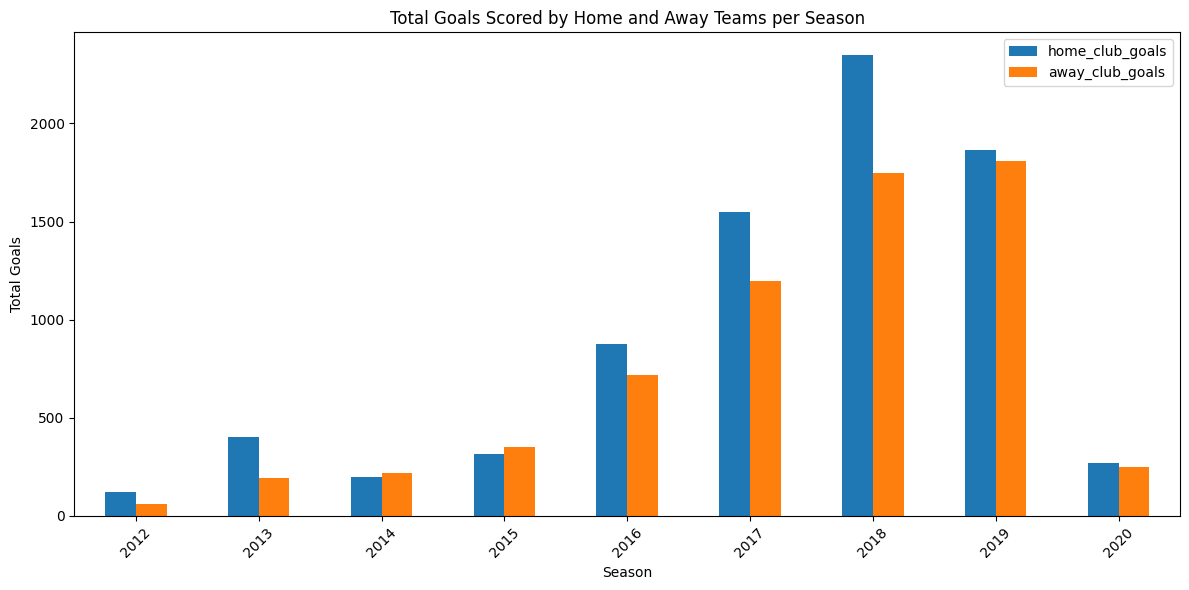

In [ ]:
# Grouping data by season
season_goals = football_data.groupby('season').agg({
    'home_club_goals': 'sum',
    'away_club_goals': 'sum'
}).reset_index()

# Plotting the data
season_goals.set_index('season')[['home_club_goals', 'away_club_goals']].plot(kind='bar', figsize=(12, 6))

# Adding titles and labels
plt.title('Total Goals Scored by Home and Away Teams per Season')
plt.xlabel('Season')
plt.ylabel('Total Goals')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

**Interpretation:**In 2018 home clubs have high scored goals..
Home Advantage: In most seasons, the number of home goals is significantly higher than the number of away goals. This highlights the importance of home-field advantage in football.


**Question2:**Is there a correlation between the number of goals scored and the total attendance in home games across seasons?

Correlation between attendance and home goals:
                 attendance  home_club_goals
attendance         1.000000         0.227098
home_club_goals    0.227098         1.000000


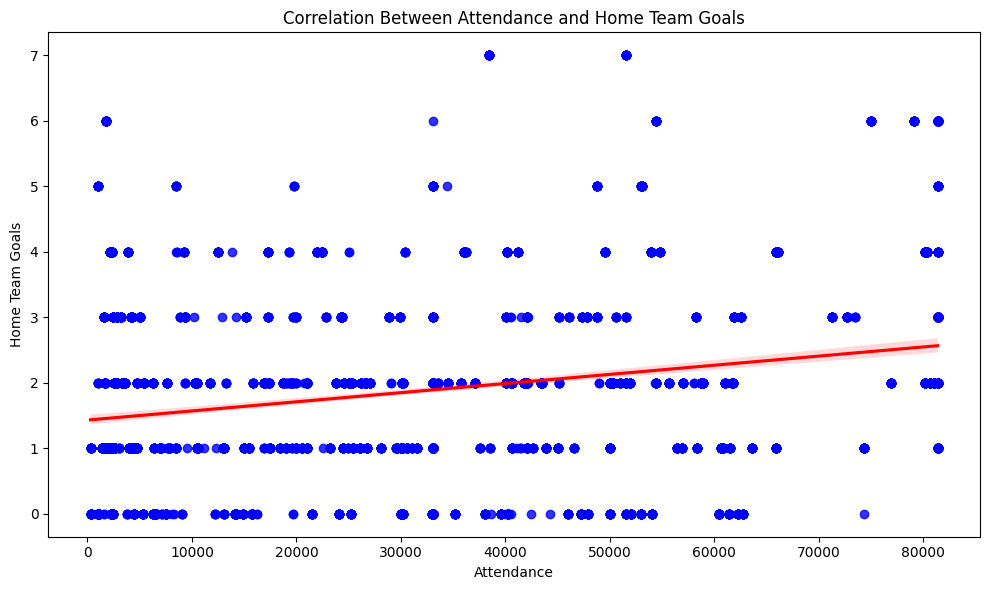

In [ ]:
correlation = football_data[['attendance', 'home_club_goals']].corr()
# Print correlation matrix
print("Correlation between attendance and home goals:")
print(correlation)

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='attendance', y='home_club_goals', data=football_data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Correlation Between Attendance and Home Team Goals')
plt.xlabel('Attendance')
plt.ylabel('Home Team Goals')
plt.tight_layout()
plt.show()

**Interpretation:**Positive Correlation: There's a positive correlation between attendance and home team goals. This suggests that as attendance increases, the number of home team goals also tends to increase.

**Question3:**Visualizing the distribution of goals scored by different teams helps identify patterns and outliers.

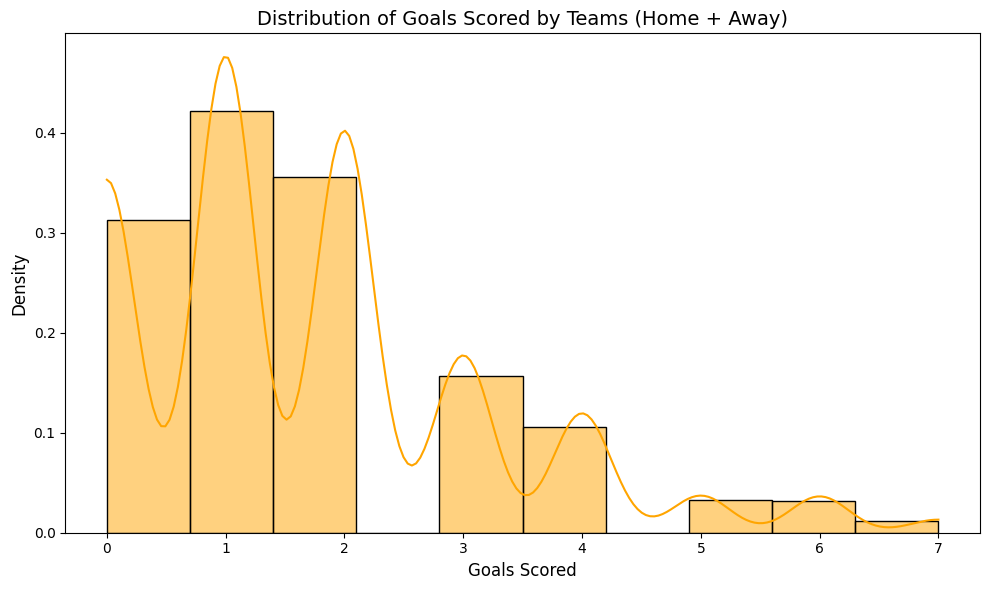

In [ ]:
# Create a combined list of goals scored
team_goals = football_data[['home_club_goals', 'away_club_goals']].melt(value_name='goals')

# Plotting a histogram of goals scored
plt.figure(figsize=(10, 6))
sns.histplot(team_goals['goals'], bins=10, kde=True,  color='orange', stat='density')

# Add titles and labels
plt.title('Distribution of Goals Scored by Teams (Home + Away)', fontsize=14)
plt.xlabel('Goals Scored', fontsize=12)
plt.ylabel('Density', fontsize=12)

plt.tight_layout()
plt.show()

**Interpretation:**Positive Skewness: The distribution is positively skewed, meaning there are more teams with fewer goals and fewer teams with a high number of goals.
Peak Around 1-2 Goals: The highest frequency of goals scored by teams is between 1 and 2 goals.
Long Tail: The distribution has a long tail to the right, indicating that a few teams score significantly more goals than the average.

**Question4:**Managers with highest win rates

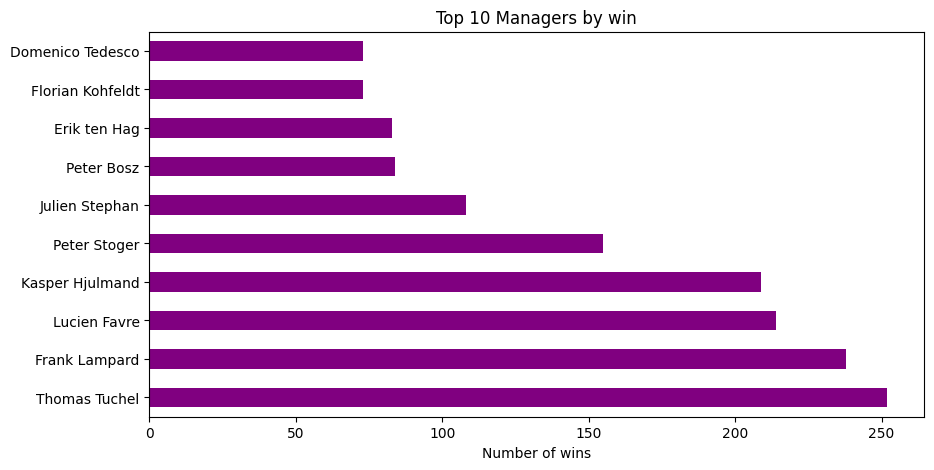

In [ ]:

football_data['home_win'] =  football_data['home_club_goals'] > football_data['away_club_goals']
football_data['away_win'] = football_data['away_club_goals'] > football_data['home_club_goals']

manager_wins =football_data.groupby('home_club_manager_name')['home_win'].sum() +\
              football_data.groupby('away_club_manager_name')['away_win'].sum()

top_managers = manager_wins.sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
top_managers.plot(kind='barh',color='purple')
plt.title('Top 10 Managers by win')
plt.xlabel('Number of wins')
plt.show()


**Interprettaion:**Dominance of Top Managers: The top few managers (Thomas Tuchel, Frank Lampard, and Lucien Favre) have a significantly higher number of wins compared to the rest. This suggests a clear hierarchy in terms of managerial success.


### ***Hypothesis Testing***

## **T_test**

**Question1:**Is there a statistically significant difference in the average home club_goals and away club goals scored? Assuming that the goals are normally distributed and that the population variances are approximately equal. Using a 5% significance level to test this hypothesis.

In [ ]:
'''H0:there is no significant difference in the average home_club_goals ansd away_club_goals  Mue=0
Ha:there is significant difference in the average home_club_goals ansd away_club_goals    Mue !=0
two sample two tailed hypothesis t_test is to be performed'''

In [ ]:
import statistics as st
#Calculate the sample statistics for home club goals and away club goals using simple random sampling without replacement.
#sample 25 rows randomly from the merged data DataFrame
goal_sample_data = football_data.sample(n=25,random_state=1)

#extarct home and away goals from the sample data
home_sample =goal_sample_data['home_club_goals']
away_sample =goal_sample_data['away_club_goals']

x1=st.mean(home_sample)
x2=st.mean(away_sample)
sd1 = st.stdev(home_sample)
sd2 = st.stdev(away_sample)
v1=(st.stdev(home_sample))**2
v2=(st.stdev(away_sample))**2
n1=len(home_sample)
n2=len(away_sample)
df= n1+n2-2
print("Sample mean of home_club_goals =",x1)
print("Sample mean of away_club_goals =",x2)
print("Sample SD  of home_sample=",sd1)
print("Sample SD  of home_sample=",sd2)
print("Sample variance of home_club_goals =",v1)
print("Sample variance of away_club_goals =",v2)
print("Sample size of home_club_goals =",n1)
print("Sample size of away_club_goals =",n2)
print('Degrees of freedom =',df)

Sample mean of home_club_goals = 1.84
Sample mean of away_club_goals = 1.32
Sample SD  of home_sample= 1.312757911167681
Sample SD  of home_sample= 1.3140268896284681
Sample variance of home_club_goals = 1.7233333333333332
Sample variance of away_club_goals = 1.7266666666666663
Sample size of home_club_goals = 25
Sample size of away_club_goals = 25
Degrees of freedom = 48


In [ ]:
from scipy.stats import t
import math

alpha=0.05 #significant level
#as this is the 2 tailed test,we have to consider alpha/2 i.e. 0.025.

#calculate teh test sattistic and p_value  for the hypothesis test

signal = abs(x1-x2)
noise = math.sqrt(v1*(n1-1) + v2*(n2-1))*math.sqrt(1/n1 + 1/n2)
t_statistic=signal/noise
print('t-statistic =',t_statistic)

p_value=t.sf(abs(t_statistic),df)*2
print("The p_value is = ", p_value)

t_critical = t.ppf(1-0.025, df)
print('t-critical =',t_critical)

t-statistic = 0.202042708452068
The p_value is =  0.840737220874958
t-critical = 2.010634757624232


As per decision rule:

p_value < alpha:rejection of null hypothesis

if -t_critical> t_statistic > +t_critical: rejection of null hypothesis

1.p_value = 0.84 > alpha=0.05, which leads to acceptance of null hypothesis

2.t_statistic =0.202<+t_critical=2.01,which leads to acceptance of null hypothesis

Interpreattion:we accep the null hypothesis there is no significant difefrence in the average in the average home_club_goals and away_club_goals scored and the hypothesis testing process identifies the same

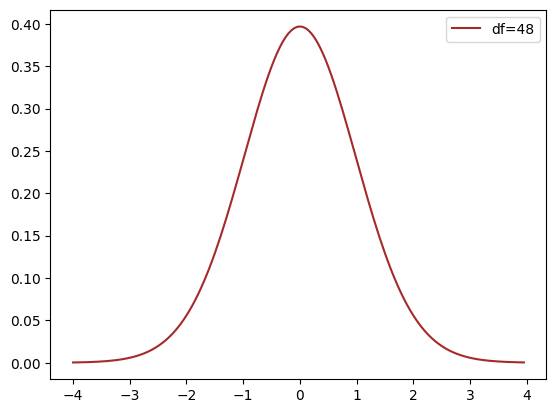

In [ ]:
#plotting the t_distribution
x=np.arange(-4,4,0.05)
tvals48 = t.pdf(x,48)
plt.plot(x,tvals48,color='brown')
plt.legend(['df=48'])
plt.show()

## **Z_test**

**Question2:**Is there a statistically significant difference in the average number of yellow cards received by home teams compared to away teams? Assume that the yellow cards are normally distributed and that the population variances are approximately equal. Use a 5% significance level to test this hypothesis.

H0: There is no significant difference in the average number of yellow cards received by home teams and away teams.
Ha: There is a significant difference in the average number of yellow cards received by home teams and away teams.
The test needs to be conducted for the value which is greater than or less than the difference of population means. So, we have to perform the two-tailed test.

In [ ]:
df = pd.DataFrame(football_data)

In [ ]:
import statistics as st
from scipy.stats import norm

# Sample 1:
home_yellow_cards = df[df['home_club_name'].notnull()]['yellow_cards']
n1 = len(home_yellow_cards)
s_mean1 = st.mean(home_yellow_cards)
s_sd1 = st.stdev(home_yellow_cards)
s_var1 = s_sd1**2

print('home_yellow_cards:')
print('Mean =' + str(s_mean1))
print('Standard Deviation =' + str(s_sd1))
print('Sample Size =' + str(n1))
print('Variance =' + str(s_var1))

# Sample 2:
away_yellow_cards = df[df['away_club_name'].notnull()]['yellow_cards']
n2 = len(away_yellow_cards)
s_mean2 = st.mean(away_yellow_cards)
s_sd2 = st.stdev(away_yellow_cards)
s_var2 = s_sd2**2

print('\naway_yellow_cards:')
print('Mean =' + str(s_mean2))
print('Standard Deviation =' + str(s_sd2))
print('Sample Size =' + str(n2))
print('Variance =' + str(s_var2))

home_yellow_cards:
Mean =0.16003810431055013
Standard Deviation =0.3666850568218633
Sample Size =4199
Variance =0.13445793089645314

away_yellow_cards:
Mean =0.16003810431055013
Standard Deviation =0.3666850568218633
Sample Size =4199
Variance =0.13445793089645314


Home_yellow_cards
Mean =0.16
Standard Deviation =0.36
Sample Size =4199
Variance =0.13

away_yellow_cards:
Mean =0.16
Standard Deviation =0.36
Sample Size =4199
Variance =0.13

We will test hypothesis about two sample test using the z-statistics.

It is given that a 5% level of significance to be used to test hypothesis.

alpha (α) = 0.05

This test is a two-tailed test, each of the two rejection regions has an area of .025.

### Establish the decision rule

i. If p-value < α : Rejection of Null Hypothesis(H0)

ii. If -z-critical > z-statistic > +z-critical : Rejection of Null Hypothesis(H0)

####Analyze teh data

In [ ]:
alpha=0.05
z_statistics = ((s_mean1 - s_mean2)- 0) / (math.sqrt(s_var1/n1 + s_var2/n2))
print("The Z statistics is ", z_statistics)

p_value = norm.sf(abs(z_statistics))*2 #two tailed test
print("The p_value is "+str(p_value))

z_critical = norm.ppf(1 - alpha/2) # two tailed test
print("The z-critical value is "+str(z_critical))

The Z statistics is  0.0
The p_value is 1.0
The z-critical value is 1.959963984540054


p_value=1.0 > alpha=0.05, which leads to acceptance of Null Hypothesis.
z_statistics=0.0 < z-critical=1.9, which leads to acceptance of Null Hypothesis.

#### Make a business decision

The business analyst accept the null hypothesis.There is no significant difference in the average number of yellow cards received by home teams and away teams.

### Construct a 95% confidence interval to estimate the difference in the mean between the two departments.

In [ ]:
#The z-value for a 95% confidence interval is 1.96.
#(s_mean1 - s_mean2) - 1.96*(math.sqrt(s_var1/n1 + s_var2/n) <= µ1 - µ2 <= (s_mean1 - s_mean2) + 1.96*(math.sqrt(s_var1/n1 + s_var2/n)
lhs=(s_mean1 - s_mean2) - 1.96*(math.sqrt(s_var1/n1 + s_var2/n2))
print(lhs)
rhs=(s_mean1 - s_mean2) + 1.96*(math.sqrt(s_var1/n1 + s_var2/n2))
print(rhs)

-0.01568524634061602
0.01568524634061602


-0.01 <= (µ1 - µ2) <= 0.01

We are 95% confident that the actual difference in mean salaries between the two departments is between -0.01 and  0.01.

The point estimate is (s_mean1 - s_mean2) = -0.02

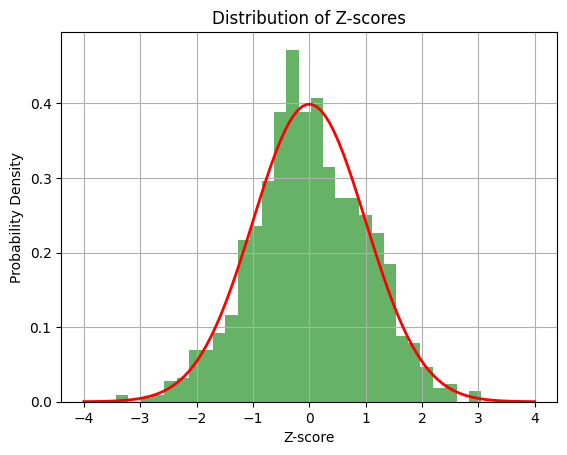

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate some random data
df = np.random.randn(1000)

# Calculate Z-scores
z_scores = (df - df.mean()) / df.std()

# Create a histogram of the Z-scores
plt.hist(z_scores, bins=30, density=True, alpha=0.6, color='g')

# Plot the standard normal distribution (mean=0, std=1)
x = np.linspace(-4, 4, 100)
plt.plot(x, norm.pdf(x), color='r', linewidth=2)

plt.xlabel('Z-score')
plt.ylabel('Probability Density')
plt.title('Distribution of Z-scores')
plt.grid(True)
plt.show()

**Interpretation:**Bell-Shaped Distribution: The shape of the histogram closely resembles the bell curve of the standard normal distribution. This suggests that the data from which these Z-scores were derived is approximately normally distributed.

Symmetry: The distribution appears to be roughly symmetrical around the mean (which is 0 for Z-scores). This indicates that the data points are evenly distributed on both sides of the mean.

Central Tendency: Most of the Z-scores fall within the central region of the distribution, with fewer scores observed in the tails. This is characteristic of a normal distribution, where the majority of data points cluster around the mean.